# Ayudantía 2 - Visualizaciones con [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) y [Seaborn](https://seaborn.pydata.org/)

En la siguiente ayudantía repasaremos una serie de visualizaciones vistas durante el módulo 3 y 4 del curso de Visualización de información en la era de Big Data.

### ¿Qué veremos en esta ayudantía?

- Repasaremos la librería pandas para procesar un dataset.
- Repasaremos gráficos claves para realizar el mini-proyecto 2.
- Hablaremos sobre los _warnings_ que salían en el código entregado y cómo solucionarlo.
- Repasaremos unos conceptos claves para el gráfico de violin.
- Repasaremos el comando `subplots` para hacer varios gráficos en una visualización.

# Pasos previos

1. Vamos a importar las 3 librerías principales del curso: Pandas, Seaborn y Matplotlib y les vamos a poner un nombre más corto con el comando `as`.

2. Vamos a dejar una configuración para que los gráficos sean más grandes. Para esto se ocupa `plt.rcParams['figure.figsize']` y se entrega una tupla con el formato (ancho, largo) medido **en pulgadas**.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ancho = 12 pulgadas
# Largo = 6 pulgadas
plt.rcParams['figure.figsize'] = (12, 6)

## Uso de pandas

Ahora, vamos a cargar el dataset que ocuparemos en la ayudantía con la librería `pandas` y luego usaremos algunas funciones claves de ella para trabajar el dataset.

In [ ]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("computer_book.csv")

Podemos usar `shape` para saber las dimensiones del dataset (número de filas, número de columnas).

In [ ]:
df.shape

(271, 7)

Para ver parte del dataset utilizaremos `head`, `tail` e `iloc`.

In [ ]:
# Ver las primeras 5 líneas del archivo
df.head(5)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [ ]:
# Ver las últimas 5 líneas del archivo
df.tail(5)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294
270,3.84,5,A Discipline for Software Engineering,Designed to help individual programmers develo...,789,Hardcover,235.650000


In [ ]:
# Ver filas 0, 1, 260 y 270 del dataset.
df.iloc[[0, 1, 260, 270]]

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
260,3.45,1,3D Game Engine Design: A Practical Approach to...,A major revision of the international bestsell...,1040,Hardcover,117.988235
270,3.84,5,A Discipline for Software Engineering,Designed to help individual programmers develo...,789,Hardcover,235.650000


Para obtener información de los datos del dataset utilizamos `describe` e `info`.

In [ ]:
# Descripción de las columnas numéricas del dataset
df.describe()

,Rating,Reviews,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000,271.000000
mean,4.067417,185.557196,475.077491,54.541860
std,0.290749,552.122252,306.147492,35.711485
min,3.000000,0.000000,50.000000,9.323529
25%,3.915000,5.500000,289.000000,30.751471
50%,4.100000,35.000000,384.000000,46.317647
75%,4.250000,116.500000,572.500000,67.854412
max,5.000000,5938.000000,3168.000000,235.650000


Usamos `info` para tener información sobre el tipo de dato que pandas identificó por columna, cuantos `NaN` (not a number) hay y el espacio de la ram ocupada.

In [ ]:
# Información más computacional del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    int64  
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 14.9+ KB


También podemos retirar columnas del dataset que no serán de interés. Para eso hay 2 formas:
- El comando `del` para eliminar la columna no deseada.
- Seleccionar las columnas que queremos mantener.

In [ ]:
df_copy = df.copy()

del df_copy["Description"]
del df_copy["Number_Of_Pages"]
del df_copy["Type"]
df_copy.head()

,Rating,Reviews,Book_title,Price
0,4.17,3829,The Elements of Style,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood",11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,12.873529
4,4.06,1325,How Google Works,13.164706


In [ ]:
df_copy = df.copy()

columnas_que_queremos = ["Rating", "Reviews", "Book_title"]
df_copy = df_copy[columnas_que_queremos]
df_copy.head()

,Rating,Reviews,Book_title
0,4.17,3829,The Elements of Style
1,4.01,1406,"The Information: A History, a Theory, a Flood"
2,3.33,0,Responsive Web Design Overview For Beginners
3,3.97,1658,Ghost in the Wires: My Adventures as the World...
4,4.06,1325,How Google Works


Adicionalmente, podemos derivar nuevas columnas al dataset. En este caso, vamos a categorizar el _rating_ de cada libro.

In [ ]:
def CalificacionLibro(rating):
    if rating >= 4.5:
        return 'Muy buena'
    if rating >= 4:
        return 'Buena'
    if rating >= 3.5:
        return 'Normal'
    return 'Mala'

print(CalificacionLibro(1))
print(CalificacionLibro(5))

Mala
Muy buena


Con el comando `apply` podemos pedirle a pandas que "aplique" una función a cada dato de una columna. En este caso, se aplica la función `CalificacionLibro` a cada dato de la columna `Rating`. Luego, la respuesta a cada dato se guarda en una nueva columna llamada `Calificacion`.

In [ ]:
df['Calificacion'] = df['Rating'].apply(CalificacionLibro)
df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Calificacion
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529,Buena
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000,Buena
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647,Mala
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529,Normal
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706,Buena


# Gráfico de barra

El gráfico de barras clásico utiliza barras horizontales o verticales para mostrar **comparaciones entre categorías**. Un eje del gráfico muestra las categorías específicas que se comparan y el otro eje representa una escala de valores numéricos.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/graficos_de_barras.svg" width="550"/>

Para empezar, vamos a ver cuánto es el precio promedio (en dólares) de los libros separados según su calificación. Para esto, primero vamos a agrupar los datos por su calificación y para cada grupo, vamos a seleccionar la columna `Price` y calcular su promedio (`mean()`).

In [ ]:
precio_por_calificacion = df.groupby('Calificacion')['Price'].mean()

print(precio_por_calificacion)

Calificacion
Buena        54.025343
Mala         50.960695
Muy buena    58.243873
Normal       55.544662
Name: Price, dtype: float64


Los datos igual son bien cercanos, mejor vamos a verlos de forma visual. Para ello, vamos a obtener el precio por calificación y vamos a graficarlo con el comando `plot.bar()`. En dicha función vamos a setear **2 parámatros**:

1. El color de las barras que será `cyan`.
2. El título del gráfico que será `"Precio promedio por calificación"`.

Adicionalmente, vamos a indicar el título que tendrá cada eje. Para esto, usamos las funciones `set_xlabel` y `set_ylabel`.

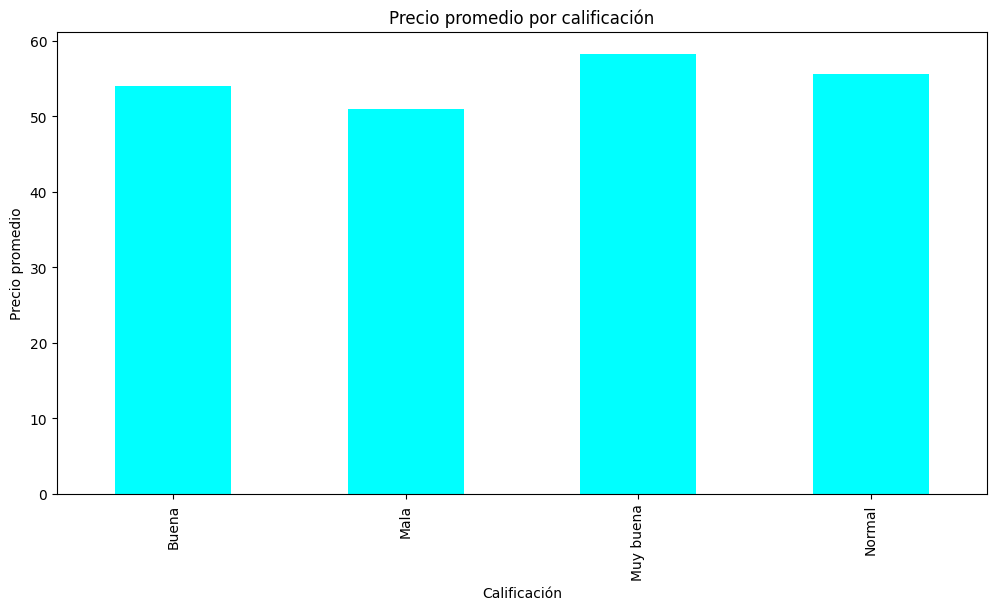

In [ ]:
precio_por_calificacion = df.groupby('Calificacion')['Price'].mean()

# Graficamos ahora el arreglo resultante
ax = precio_por_calificacion.plot.bar(
    color = 'cyan',
    title = 'Precio promedio por calificación'
    )

ax.set_xlabel("Calificación")
ax.set_ylabel("Precio promedio")

plt.show()

¿Que tal será el número de página promedio por calificación? ¿y si queremos un gráfico horizontal? Veamos ambas opciones en el siguiente gráfico. Solo tenemos que:
- Cambiar el parámetro a cual calcular el promedio. En este caso debemos usar `Number_Of_Pages`.
- Cambiar `bar`, por `barh`.

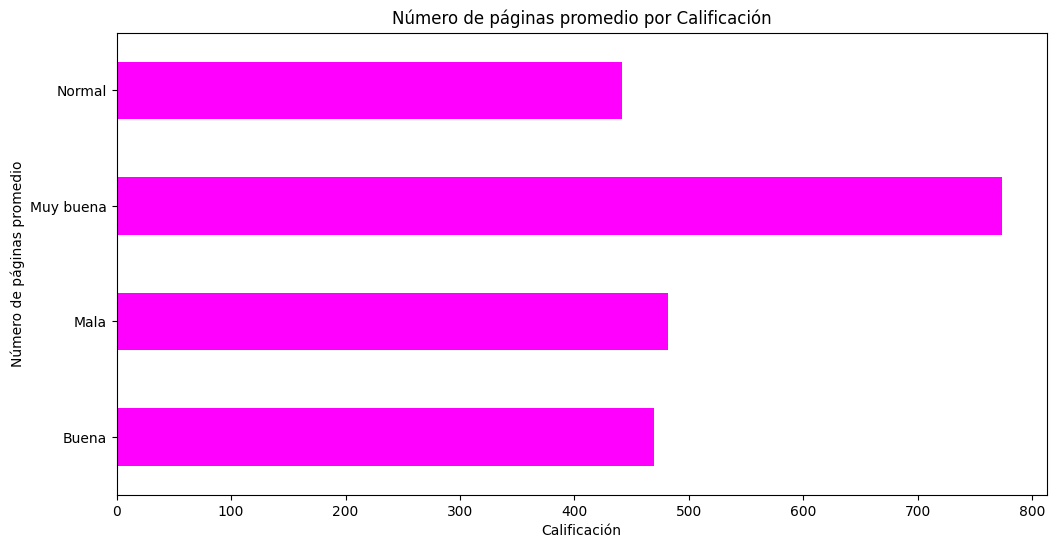

In [ ]:
numero_pagina_por_calificacion = df.groupby('Calificacion')['Number_Of_Pages'].mean()

# Si hacemos barh en vez de bar, tendremos el gráfico de forma horizontal.
ax = numero_pagina_por_calificacion.plot.barh(
    color = 'magenta',
    title = 'Número de páginas promedio por Calificación'
    )

ax.set_xlabel("Calificación")
ax.set_ylabel("Número de páginas promedio")

plt.show()

¿Y si queremos un gráfico ordenado? Entonces usamos la función `sort_values` para ordenar los datos.

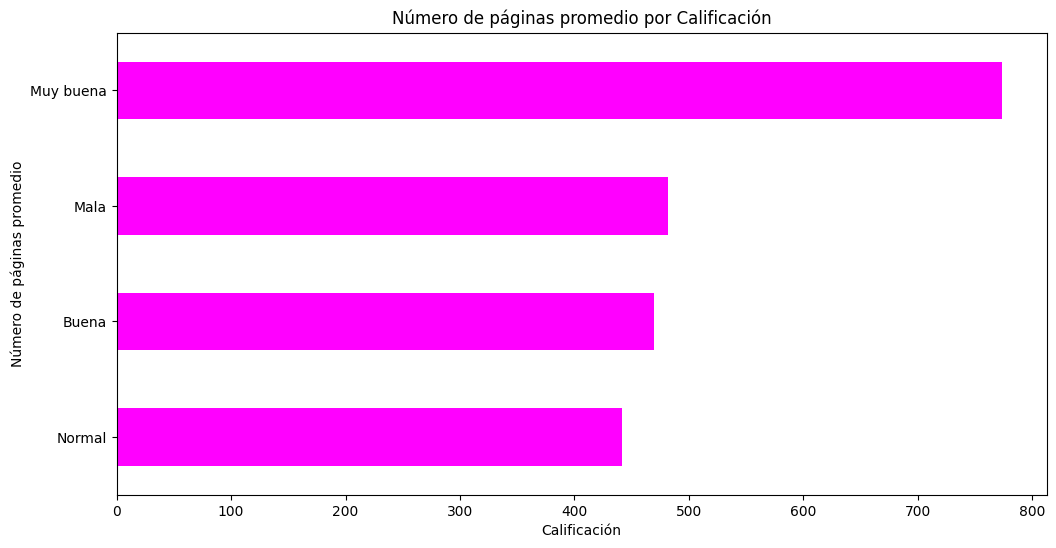

In [ ]:
numero_pagina_por_calificacion = df.groupby('Calificacion')['Number_Of_Pages'].mean()

# Nueva línea para ordenar
numero_pagina_por_calificacion = numero_pagina_por_calificacion.sort_values()

ax = numero_pagina_por_calificacion.plot.barh(
    color = 'magenta',
    title = 'Número de páginas promedio por Calificación'
    )

ax.set_xlabel("Calificación")
ax.set_ylabel("Número de páginas promedio")

plt.show()

También podemos agregar el valor exacto de cada barra. Desde la versión 3.4 de matplotlib se agregó una nueva función llamada `bar_label` para poder incluir el valor de las barras.

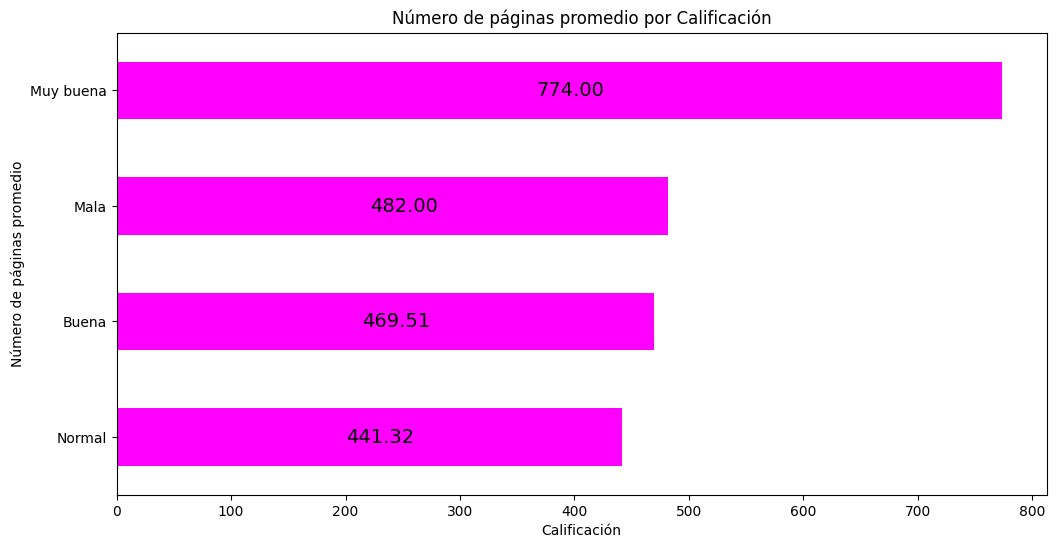

In [ ]:
numero_pagina_por_calificacion = df.groupby('Calificacion')['Number_Of_Pages'].mean()
numero_pagina_por_calificacion = numero_pagina_por_calificacion.sort_values()

ax = numero_pagina_por_calificacion.plot.barh(
    color = 'magenta',
    title = 'Número de páginas promedio por Calificación'
    )

# Esta línea agregará los valores en cada barra
# fmt='%.2f' -> 2 decimales
ax.bar_label(ax.containers[0], fmt='%.2f', label_type="center",
             padding=8, fontsize=14)

ax.set_xlabel("Calificación")
ax.set_ylabel("Número de páginas promedio")

plt.show()

# Histograma

Un histograma visualiza la **distribución de los datos a lo largo de un intervalo**. Cada barra en un histograma representa la **frecuencia** en cada intervalo/bin. El área total del histograma es igual al número de datos. Si bien utiliza las mismas marcas que un gráfico de barra, la interpretación de su información será distinta.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/histograma.svg" width="550"/>

Lo primero que haremos es ver cómo distribuye la cantidad de hojas en los libros de computación. Para eso, ocupamos el comando `distplot`.

<ipython-input-18-b522bab45efb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["Number_Of_Pages"])


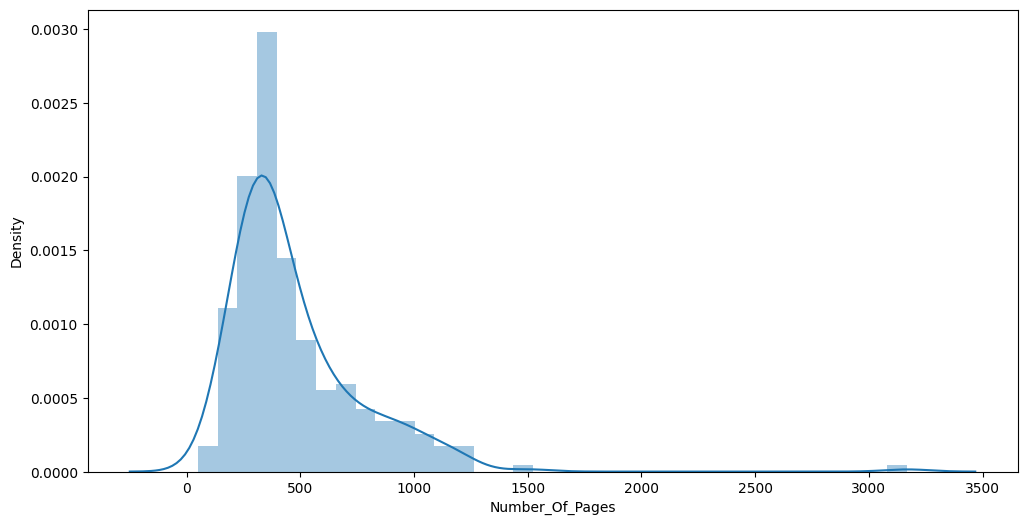

In [ ]:
# Veremos la distribución de la variable Number_Of_Pages (número de páginas)
# con un histograma
ax = sns.distplot(df["Number_Of_Pages"])

### ⚠ Ojo: nos aparece un _warning_
Esto nos indica que en las futuras versiones de la librería Seaborn, está función ya no estará disponible. Por ello, el mismo _warning_ nos sugiere cambiarlo por `displot` (antes era `distplot`) o `histplot`. En este caso usaremos el segundo.

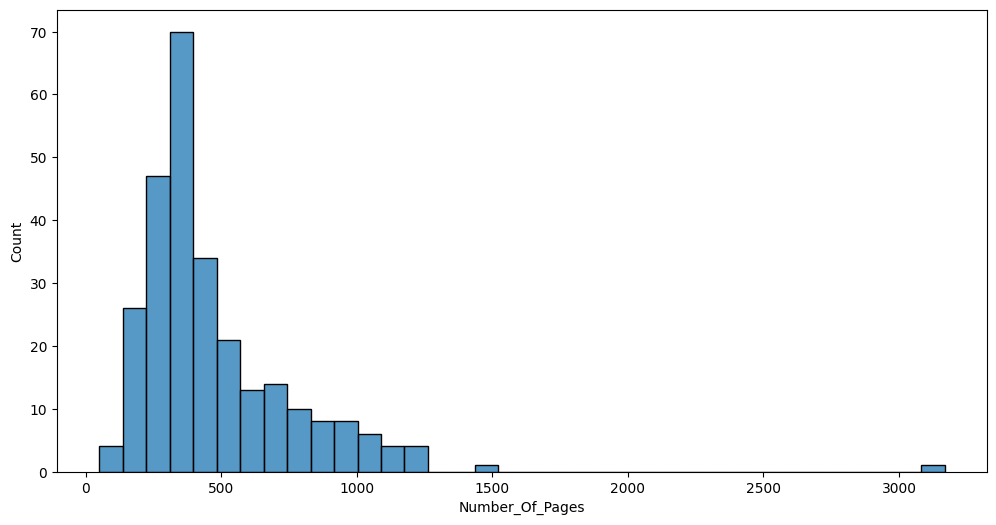

In [ ]:
ax = sns.histplot(df["Number_Of_Pages"])

La línea de densidad ya no es por defecto. Por lo tanto, si queremos verla debemos activarla con el parámetro `kde=True`.

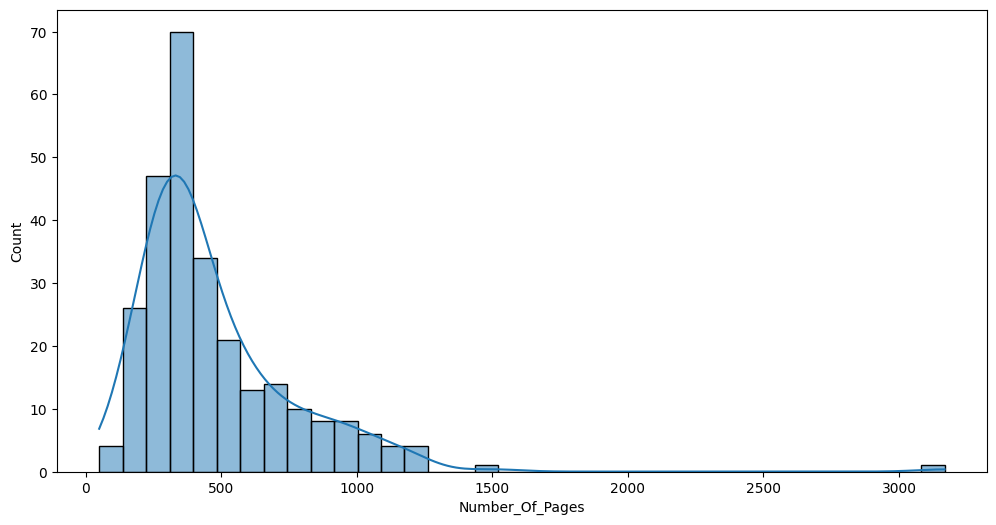

In [ ]:
ax = sns.histplot(df["Number_Of_Pages"], kde=True)

Ahora, si queremos ver 2 histogramas superpuestos, podemos llamar 2 veces a la función `histplot`. Adicionalmente, vamos a setear 2 parámetros más:

1. `Color` para indicar el color de las barras.
2. `label` para indicar qué etiqueta poner a este gráfico en el caso de mostrar la leyenda.

Finalmente usamos `plt.legend` para pedirle a matplotlib que incluya la legenda en esta visualización.

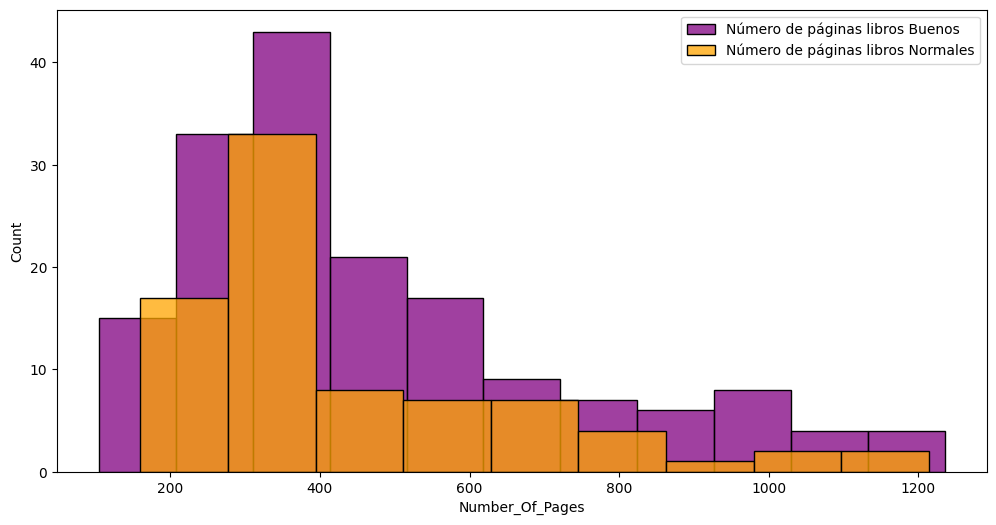

In [ ]:
# Ahora, por defecto ya no veremos la función de densidad de probabilidad.
# Si queremos agregarla, usamos el atributo kde = True.

sns.histplot(
    df[df.Calificacion == "Buena"].Number_Of_Pages,
    color="purple",
    label="Número de páginas libros Buenos"
    )
sns.histplot(
    df[df.Calificacion == "Normal"].Number_Of_Pages,
    color="orange",
    label="Número de páginas libros Normales"
    )

plt.legend()

plt.show()

# Gráfico de Caja

Un diagrama de cajas y bigotes es una manera conveniente de mostrar visualmente grupos de datos numéricos a través de sus cuartiles.

Las líneas que se extienden paralelas a las cajas se conocen como «bigotes», y se usan para indicar variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos se representan a veces como puntos individuales que están en línea con los bigotes. Los diagramas de cajas y bigotes se pueden dibujar vertical u horizontalmente.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/diagrama_cajas_y_bigotes.svg" width="550"/>

Anteriormente vimos cómo distribuye el precio en función de la frecuencia de datos. Ahora vamos a observar esa misma información pero con un gráfico de caja. Para esto, utilizamos la función `boxplot`.

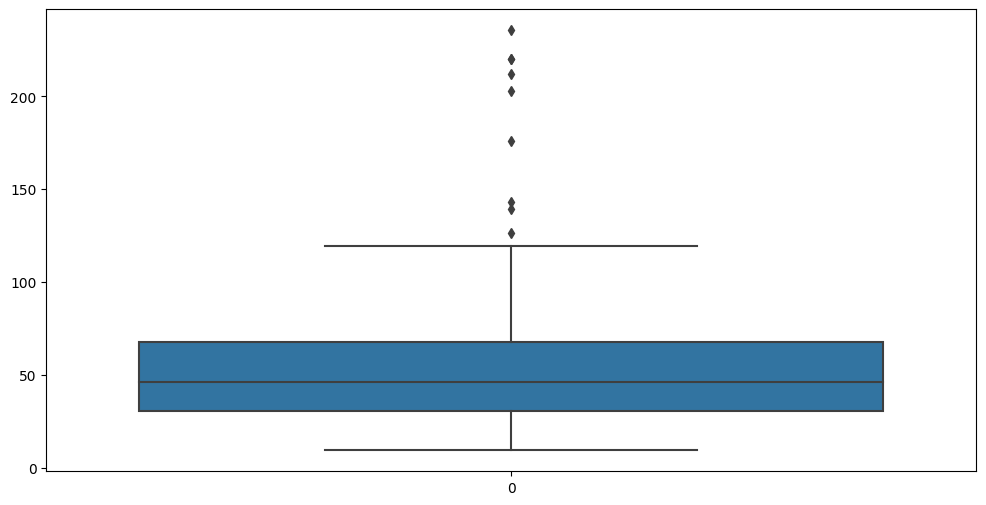

In [ ]:
# Veremos la distribución de la variable Price (precio en dólares) con un gráfico de caja.
ax = sns.boxplot(df.Price)

Si queremos que el gráfico sea horizontal, agregamos el parámetro que indica el eje a utilizar (`y=`). Adicionalmente vamos a cambiarle el color con el parámetro `color`.

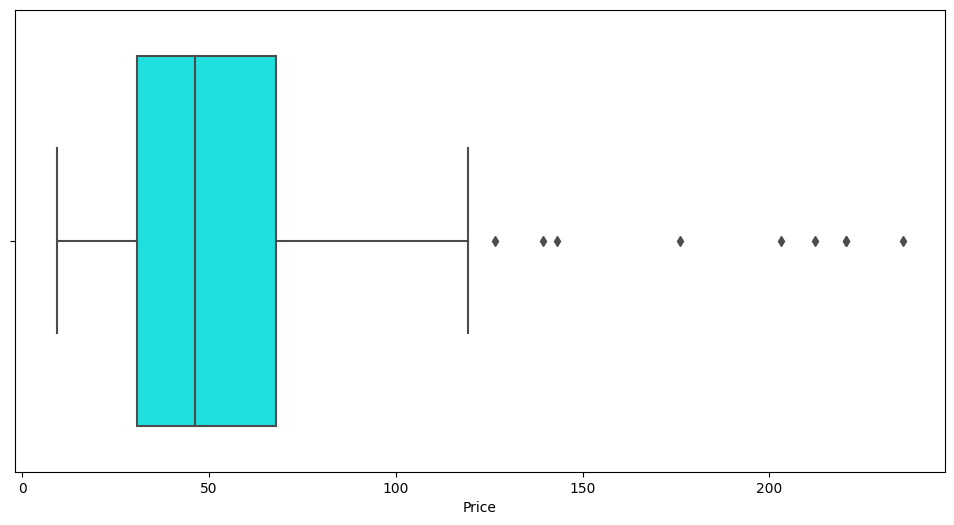

In [ ]:
ax = sns.boxplot(
    x=df.Price,
    color="Cyan"
    )

Ver solo 1 caja a veces no nos da mucha información. Por lo mismo, vamos a ver si hay una diferencia de distribuciones en el precio de los libros según el tipo de libro. Para eso, vamos a cambiar un poco la forma de como usar `boxplot`. Ya no vamos a entregar los datos en el eje `x=` o `y=`, sino que entregamos **todo el dataset** en el parámetro `data` y con los parámetros `x`, `y` indicamos el nombre de las columnas a utilizar. De esta forma, seaborn se encarga de agrupar los datos según el eje que tenga el atributo categórico.

Adicionalmente, vamos a indicarle a seaborn que utilice otra paleta de colores para pintar las cajas. Para esto está el parámetro `palette` donde le damos algún valor de los que salen en el siguiente enlace: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<Axes: xlabel='Type', ylabel='Price'>

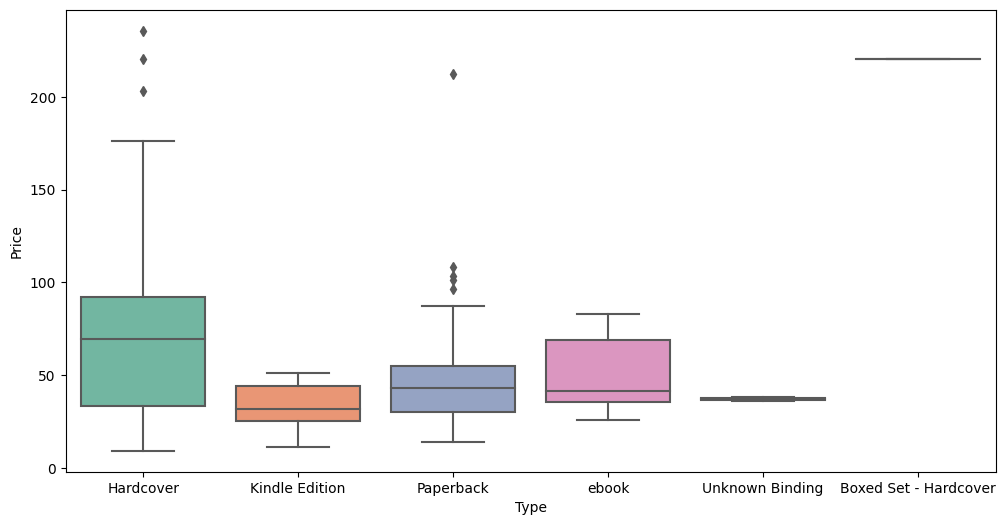

In [ ]:
sns.boxplot(
    x="Type",
    y="Price",
    data=df,
    palette="Set2"
    )

Si queremos ver las cajas de forma horizontal, solo intercambios el `x=` e `y=`.

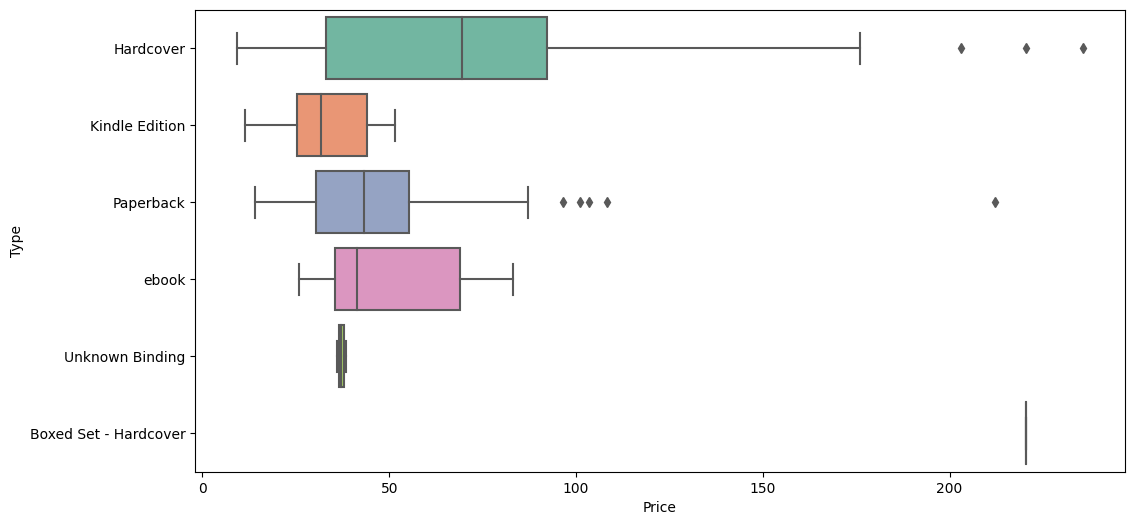

In [ ]:
# Antes - sns.boxplot(x="Type", y="Price", data=df, palette="Set2")
sns.boxplot(
    x="Price",
    y="Type",
    data=df,
    palette="Set2"
    )

plt.show()

# Gráfico de Violin

Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.

Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/diagrama_de_violin.svg" width="550"/>

La función para hacer este tipo de gráfico se llama `violinplot` y se ocupa **exactamente igual** al `boxplot`. Es decir, entregamos el dataset al parámetro `data`, e indicamos las columnas a ocupar con `x` e `y`.

<Axes: xlabel='Price', ylabel='Type'>

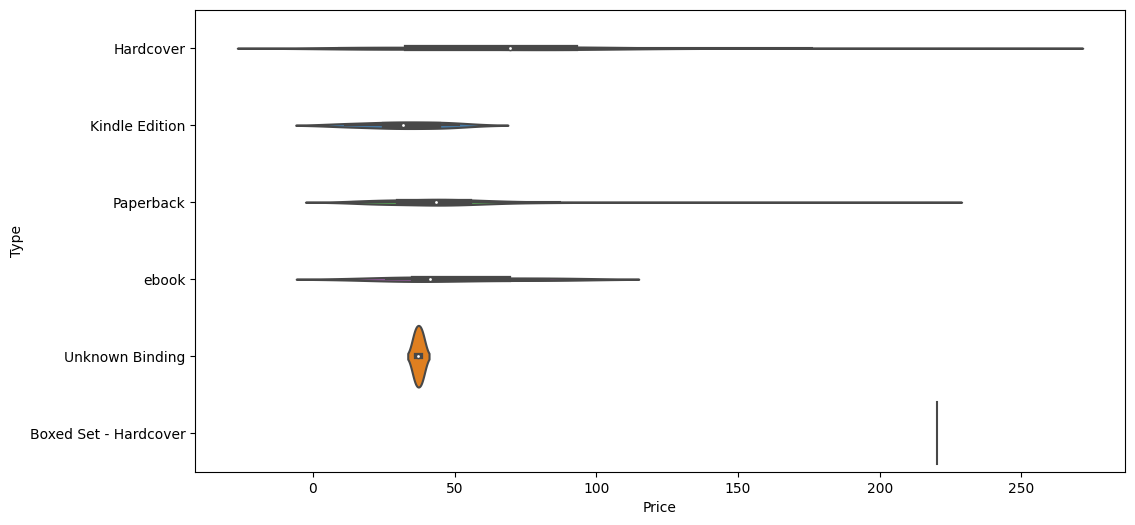

In [ ]:
sns.violinplot(
    x="Price",
    y="Type",
    data=df,
    palette="Set1"
    )

Si queremos ver solo 1 diagrama de violin, hacemos lo mismo que el caso del `boxplot`. Entregamos los datos que deseamos al parámetro `x` o `y`. Recordar que `y` se ocupa si queremos el gráfico vertical y `x` si lo queremos horizontal.

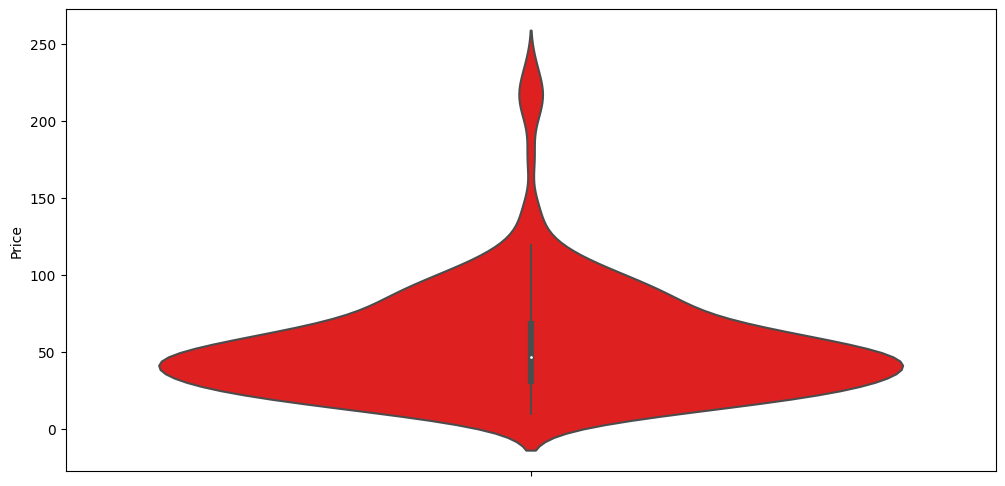

In [ ]:
sns.violinplot(
    y=df.Price,
    color="red"
    )

plt.show()

### Gráfico de Caja VS Gráfico de Violin

Pero ¿cómo se compara este gráfico con el gráfico de caja que hicimos antes?

Intentemos comparalos al mismo tiempo con `subplots` y seaborn.

**⚠ Cuidado** `subplots` con seaborn es distinto a hacer `subplots` con matplotlib.

Primero usamos `subplots` para indicar que haremos una grilla de 1x2, es decir, 1 fila de 2 columnas. Además, hacemos `sharey=True` para indicar que ambos deben tener el mismo eje Y. Esta función nos retorna 2 elementos:
- `fig`. Este objeto nos sirve para trabajar con toda la visualización. Lo típico es usar este elemento para definir un título general.
- `charts`. Este elemento es una lista con el gráfico de cada posición.

Luego, usamos los comandos `boxplot` y `violinplot` tal como lo hicimos antes. La diferencia que ahora usamos el parámetro `ax=charts[x]` para indicar que la visualización la debe poner en dicha casilla. `charts[0]` apunta la primera posición (el de la izquieda) y `charts[1]` apunta a la segunda posición (el de la derecha).

Finalmente, usamos `fig.suptitle` para definir el título general de la visualización.

Text(0.5, 0.98, 'Boxplot VS Violinplot')

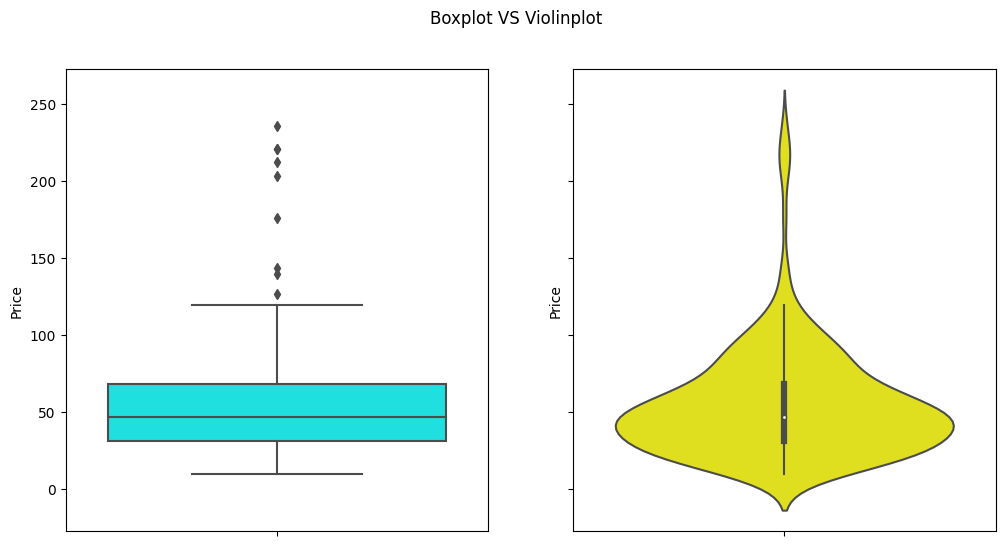

In [ ]:
fig, charts = plt.subplots(1,2, sharey=True)

sns.boxplot(y=df.Price, color="cyan", ax=charts[0])
sns.violinplot(y=df.Price, color="yellow", ax=charts[1])

fig.suptitle('Boxplot VS Violinplot')


![Gráfico de caja VS de torta](https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png)
Fuente: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

# Gráfico de Torta

Gráfico usado extensamente en presentaciones y oficinas. Cada longitud de arco representa una proporción de cada categoría, mientras que el círculo completo representa la suma total de todos los datos, igual al 100%. Es una visualización ideal para **presentar la proporcion de los datos** cuando estamos frente a **pocas categorías**.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/graficos_de_tarta.svg" width="550"/>

Para esta visualización, vamos a ver como es la proporción de libros según la calificación, pero no con fines de **comparar**, sino solo para tener una noción de los datos. Para esto, agrupamos el dataset por la columna `Calificacion` y le pedimos a pandas que para cada grupo cuenta la cantidad de items (`size`).

Adicionalmente, queremos ver los datos en términos de porcentaje. Así que dividimos todo por la cantidad total de libros.

In [ ]:
# Agrupamos por el dato en común y contamos cuantas propinas hay por dato
calificacion_distribucion = df.groupby("Calificacion").size()
print(calificacion_distribucion)
print()

calificacion_distribucion = calificacion_distribucion / calificacion_distribucion.sum()
print(calificacion_distribucion)

Calificacion
Buena        167
Mala          11
Muy buena     12
Normal        81
dtype: int64

Calificacion
Buena        0.616236
Mala         0.040590
Muy buena    0.044280
Normal       0.298893
dtype: float64


Para crear un gráfico de torta, usamos el método `pie` de matplotlib y le entregamos la lista de valores. En este caso, el método va a retornar una lista con los diferentes objetos presentes en la visualiazción. Lo importante es el primer elemento (`pie_chart[0]`) que es una lista con cada segmente circular que matplotlib puede usar despues para la leyenda.

Luego, usamos el comando `legend` para indicarle a matplotlib que debe incluir la leyenda en la visualización. Los parámetros entregados son 5:

1. Primero le entregamos `pie_chart[0]` para indicarle a matplotlib cuáles son los elementos visuales que debe aplicar legenda.
2. Segundo le entregamos una lista con los nombres de cada segmento. Para esto usamos `calificacion_distribucion.index` que retorna la lista `["Buena", "Mala", ...]`.
3. Agregamos 3 parámetros adicional:
    1. `title` para definir un título de la leyenda.
    2. `loc`para indicar donde poner la leyenda dentro de un área definida internamente por matplotlib. En este caso, arriba a la derecha **dentro de dicha área**
    3. `bbox_to_anchor`para indicar la coordenada desde donde empezar esa área que define matplotlib. (1,1) nos dice que dicha área estará arriba y a la derecha. En el siguiente [link](https://www.delftstack.com/es/howto/matplotlib/specify-legend-position-in-graph-coordinates-matplotlib/) se detalla más como funciona este parámetro.

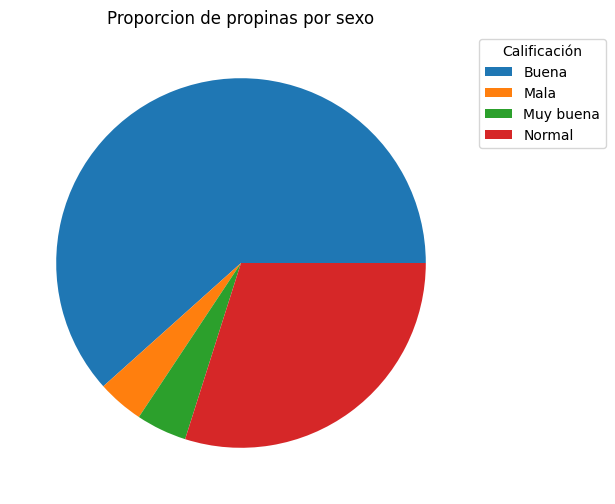

In [ ]:
pie_chart = plt.pie(calificacion_distribucion)

# Se agrega la leyenda en donde se le entrega la lista de cada segmento circular una lista de strings
# que será el nombre asignado a cada elemento y le damos un título a la leyenda
plt.legend(
    pie_chart[0],
    calificacion_distribucion.index,
    title="Calificación",
    loc='upper left',
    bbox_to_anchor=(1, 1)
    )

#Se asigna un título al gráfico
plt.title("Proporcion de propinas por sexo")

plt.show()

Ahora, ¿qué tal ver la proporción de libros por `Calificación` y por `Type` simultaneamente?
Dado que el mini-proyecto 2 pide hacer una visualización similar de 2 gráficos en una misma fila. Nosotros haremos una variación: 2 gráficos en una misma columna.

Lo primero, es definir nuestros 2 dataset con el `groupby` según el atributo a calcular su proporción.

Luego usamos `subplots` donde indicamos que queremos **2 columnas** y **1 fila**. Este comando nos retorna `2 objetos`.

1. `fig`. Este objeto nos sirve para trabajar con toda la visualiazción. Lo típico es usar este elemento para definir un título general.

2. `charts`. Este elemento es una lista con el gráfico de cada posición.

`subplots` con matplotlib funciona un poco distinto a seaborn. Aquí no definimos `ax=charts[0]`, sino que cada gráfico dentro de charts cuenta con las funcionalidades de matplotlib. Por lo tanto, debemos hacer `charts[0].pie` para indicar que el gráfico de la primera posición sea uno de torta.

Luego, para cada gráfico nuevamente definimos su leyenda con `charts[0].legend` y su título con `chars[0].set_title`. Finalmente, escribimos un título para la visualización total  con `fig.suptitle`.

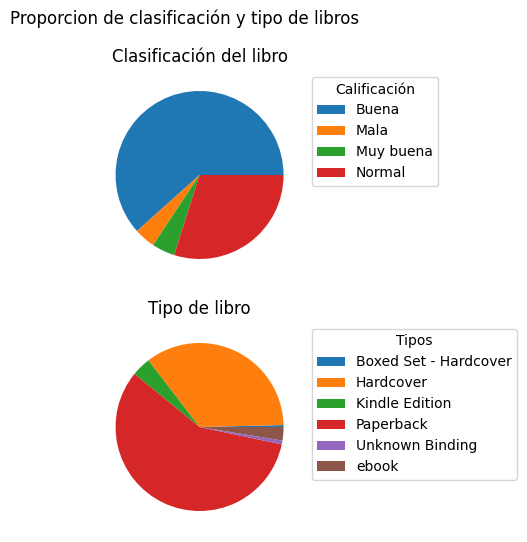

In [ ]:
calificacion_distribucion = df.groupby("Calificacion").size()
tipo_distribucion = df.groupby("Type").size()

fig, charts = plt.subplots(2,1)

# Definimos cada gráfico
charts[0].pie(calificacion_distribucion)
charts[1].pie(tipo_distribucion)

# Se agrega la leyenda a cada gráfico.
charts[0].legend(
    calificacion_distribucion.index,
    title="Calificación",
    loc='upper left',
    bbox_to_anchor=(1, 1)
    )

charts[1].legend(
    tipo_distribucion.index,
    title="Tipos",
    loc='upper left',
    bbox_to_anchor=(1, 1)
    )

# Se asigna el título a cada sub-gráfico
charts[0].set_title("Clasificación del libro")
charts[1].set_title("Tipo de libro")

#Se asigna un título al gráfico
fig.suptitle("Proporcion de clasificación y tipo de libros")


plt.show()

¿Qué pasa si le queremos agregar un número a cada sección? Podemos ocupar `autopct`.

Link recomendado: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

# Pequeños Multiples

Este gráfico, tambien llamado: _trellis chart_, _lattice chart_, _grid chart_ o _panel chart_ consiste en una serie o cuadrícula de pequeños gráficos **todos con la misma codificación** , lo que permite **compararlos** fácilmente y **no comparten datos**. Es decir, cada gráfico presenta un subconjunto distinto del dataset.

Para este caso, vamos a intentar comparar la cantidad de libros que tenemos por tipo, **pero** separados según la cantidad de comentarios que tienen los libros. De esta forma, podemos ver si los libros muy comentados tienen un comportamiento distinto a los que tienen muy pocos comentarios. Para lograr esto, primero vamos a categorizar la cantidad de comentarios. Los números seleccionados fueron seleccionado por nosotros solo con fines educativos.

In [ ]:
def Comentado(reviews):
    if reviews >= 600:
        return "Demasiado"
    if reviews >= 50:
        return "Lo esperado"
    return "Casi Nada"

Luego, vamos a crear una copia del dataset y agregar esta nueva columna.

Posteriormente, vamos a agrupar por tipo y la nueva columna (`Comentado`). Para cada grupo generado, vamos a contar cuantos libros hay (`size`).

In [ ]:
df_2 = df.copy()
df_2["Comentado"] = df_2["Reviews"].apply(Comentado)
df_agrupado_2 = df_2.groupby(["Type", "Comentado"]).size()
df_agrupado_2

Type                   Comentado  
Boxed Set - Hardcover  Casi Nada       1
Hardcover              Casi Nada      58
                       Demasiado      10
                       Lo esperado    27
Kindle Edition         Casi Nada       6
                       Demasiado       1
                       Lo esperado     3
Paperback              Casi Nada      87
                       Demasiado       5
                       Lo esperado    64
Unknown Binding        Lo esperado     2
ebook                  Casi Nada       4
                       Lo esperado     3
dtype: int64

 Hasta este momento, pandas entrega un `dataframe` con filas indexadas según el dato agrupado. Nosotros queremos todo como un dataset normal (con 3 columnas y sin índices). Para esto ocupamos `reset_index()`. Adicionalmente le cambiamos el nombre a las columnas para facilitar el trabajo.

In [ ]:
df_agrupado_2 = df_agrupado_2.reset_index()
print(df_agrupado_2.columns)

# Cambiar nombre
df_agrupado_2.columns = ["Type", "Comentado", "Cantidad"]

# Ver como queda ahora
df_agrupado_2

Index(['Type', 'Comentado', 0], dtype='object')


,Type,Comentado,Cantidad
0,Boxed Set - Hardcover,Casi Nada,1
1,Hardcover,Casi Nada,58
2,Hardcover,Demasiado,10
3,Hardcover,Lo esperado,27
4,Kindle Edition,Casi Nada,6
5,Kindle Edition,Demasiado,1
6,Kindle Edition,Lo esperado,3
7,Paperback,Casi Nada,87
8,Paperback,Demasiado,5
9,Paperback,Lo esperado,64


Ahora si, ¡vamos a visualizar!

Para crear un _small multiples_ primero debemos crear nuestra grilla con `sns.FacetGrid` donde definimos 3 parámetros importantes:

1. `data=df_agrupado_2`: indicar de dónde provienen los datos.
2. `col="Comentado"`: indicar qué columna utilizar para definir cuántos gráficos hay. Cada gráfico será para un valor distinto de la columna `Comentado`.
3. `col_wrap=3`: indicar cuántas columnas pueden haber. Si hay más gráficos que el tamaño máximo de columna, los siguientes pasan a una segunda fila.

**Importante:** esta función (`sns.FacetGrid`) solo genera los gráficos sin datos, ahora falta indicar con qué llenar cada gráfico.

Para llenar los datos, usamos el comando `map` donde:

1.  El primer argumento se usa para indicar con qué gráfico llenar cada celda.
2. Los siguientes parámetros son usados por el gráfico que decidimos. En este caso, dado que usamos `plt.barh`, los siguientes argumentos deben ser la columna para el eje X, y luego la columna para utilizar en el eje Y. En este caso, serían `Type`y `Cantidad`.

Adicionalmente, usamos `set_axis_labels` para indicar el nombre del eje X e Y.

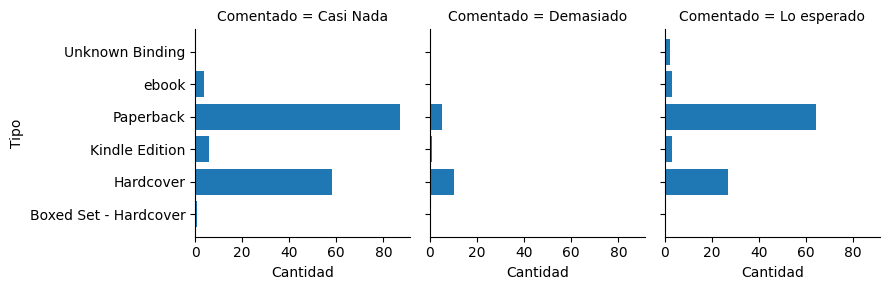

In [ ]:
# Esta función solo genera los gráficos sin datos, ahora falta indicar con qué llenar cada gráfico
grid = sns.FacetGrid(
    data=df_agrupado_2,
    col="Comentado",
    col_wrap=3
    )

grid.map(plt.barh, "Type", "Cantidad")

# Agregamos el label a los ejes
grid.set_axis_labels("Cantidad", "Tipo")

# Visualizar el gráfico
plt.show()

¿Cómo hago si quiero ver las columnas con un cierto orden? Agregamos `col_order`.

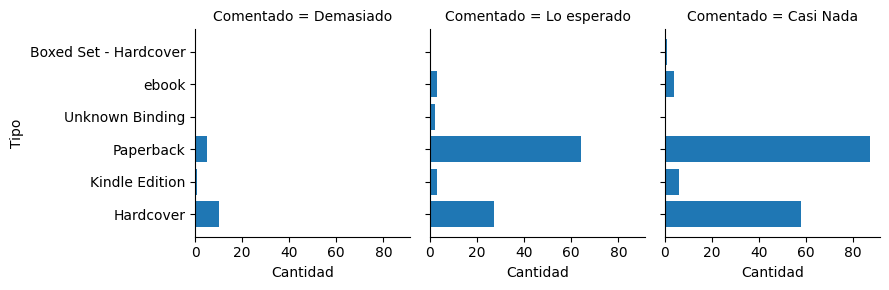

In [ ]:
# col_order Para indicar el orden
grid = sns.FacetGrid(
    data=df_agrupado_2,
    col="Comentado",
    col_wrap=3,
    col_order=["Demasiado", "Lo esperado", "Casi Nada"]
    )

grid.map(plt.barh, "Type", "Cantidad")

grid.set_axis_labels("Cantidad", "Tipo")

plt.show()

# Mapa de calor

Los mapas de calor consisten en generar una grilla donde cada fila y columna es un valor distinto de dos columnas del dataset y cada celda codifica, través de variaciones en el color, un valor numérico.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/mapa_de_calor.svg" width="550"/>

Debido a su dependencia del color para comunicar valores, los mapas de calor son un gráfico más adecuado para mostrar una visión más generalizada de los datos numéricos, ya que es más difícil distinguir con precisión las diferencias entre tonos de color y extraer puntos de datos específicos.

Para este último gráfico, vamos a intentar ver un resumen de la cantidad de comentarios que tienen los libros según el tipo y calificación. ¿Será posible ver que hay libros con muy pocos comentarios pero son muy buenos?

Para lograr este objetivo, primero vamos a agrupar el dataset por 2 categorías: tipo y calificación. Luego, para cada grupo vamos a calcular la cantidad promedio de reviews que hay.

In [ ]:
df_agrupado = df.groupby(["Type", "Calificacion"])["Reviews"].mean()
df_agrupado

Type                   Calificacion
Boxed Set - Hardcover  Buena            36.000000
Hardcover              Buena           359.237288
                       Mala              1.000000
                       Muy buena        28.000000
                       Normal          270.687500
Kindle Edition         Buena           250.833333
                       Mala              0.000000
                       Normal           20.000000
Paperback              Buena           159.168421
                       Mala              1.222222
                       Muy buena        99.250000
                       Normal           50.227273
Unknown Binding        Buena           125.000000
                       Normal          122.000000
ebook                  Buena            60.600000
                       Muy buena         0.000000
                       Normal           57.000000
Name: Reviews, dtype: float64

Nuevamente, nos enfrentamos a un dataset donde type y calificación son índices para buscar una fila. Queremos un dataset con 3 columnas. Así que recurrimos a `reset_index()`

In [ ]:
df_agrupado_sin_index = df_agrupado.reset_index()
df_agrupado_sin_index.head()

,Type,Calificacion,Reviews
0,Boxed Set - Hardcover,Buena,36.000000
1,Hardcover,Buena,359.237288
2,Hardcover,Mala,1.000000
3,Hardcover,Muy buena,28.000000
4,Hardcover,Normal,270.687500


Ahora usamos la función `pivot` que nos permite generar una matriz donde:

1.  Cada fila serán los valores distinto de la columna indicada (`Type` en este caso).
1.  Cada columna serán los valores distinto de la columna indicada (`Calificacion` en este caso).
1.  Cada celda será el valor numérico de la columna `Reviews` asociado a la fila y columna que corresponda.

In [ ]:
df_pivoteado = df_agrupado_sin_index.pivot(index="Type", columns="Calificacion", values="Reviews")
df_pivoteado

Calificacion,Buena,Mala,Muy buena,Normal
Type,,,,
Boxed Set - Hardcover,36.000000,NaN,NaN,NaN
Hardcover,359.237288,1.000000,28.00,270.687500
Kindle Edition,250.833333,0.000000,NaN,20.000000
Paperback,159.168421,1.222222,99.25,50.227273
Unknown Binding,125.000000,NaN,NaN,122.000000
ebook,60.600000,NaN,0.00,57.000000


### ⚠ Ojo: nos aparece NAN

Podemos notar que hay `NaN` esto es porque no existía un valor para dicha celda. Pero Pandas tiene la solución: `fillna` se encarga de reemplazar todas esas casillas con un valor que definamos. En este caso "0". Además, esta función tiene el parámetro `inplace` que nos permite modificar el `dataframe` en vez de generar uno. Si ponemos `inplace=False`, deberíamos hacer:

`df_pivoteado = df_pivoteado.fillna(0)`

In [ ]:
df_pivoteado.fillna(0, inplace=True)
df_pivoteado

Calificacion,Buena,Mala,Muy buena,Normal
Type,,,,
Boxed Set - Hardcover,36.000000,0.000000,0.00,0.000000
Hardcover,359.237288,1.000000,28.00,270.687500
Kindle Edition,250.833333,0.000000,0.00,20.000000
Paperback,159.168421,1.222222,99.25,50.227273
Unknown Binding,125.000000,0.000000,0.00,122.000000
ebook,60.600000,0.000000,0.00,57.000000


Ahora usamos la función `heatmap` de seaborn para construir el gráfico.

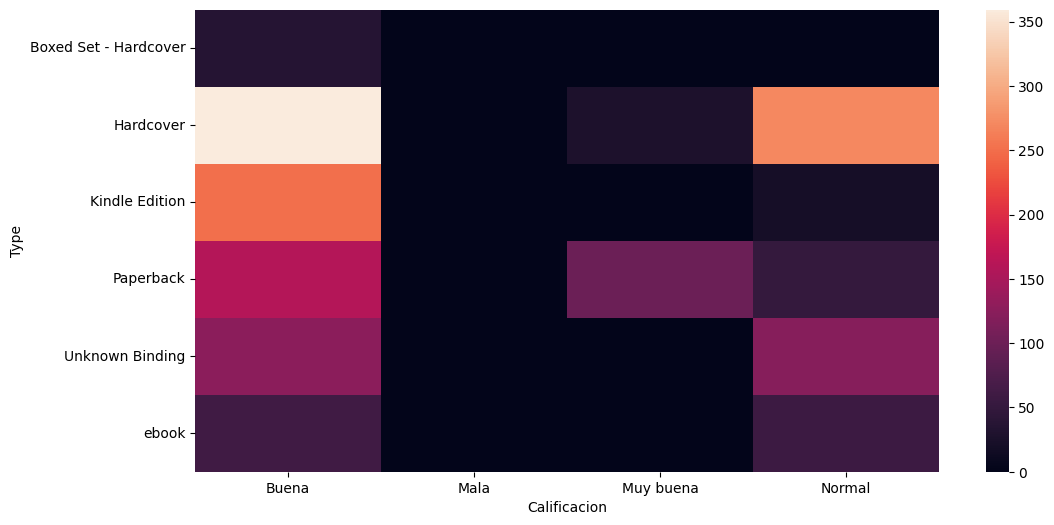

In [ ]:
# sns.heatmap recibe el dataset indexado y crea un mapa de calor
ax = sns.heatmap(df_pivoteado)

Siempre es bueno poder personalizar el gráfico. En este caso vamos a hacer varias modificaciones con diversos parámetros:

- `annot` específica si se escribe o no el valor en la celda.
- `fmt` específica el formato de escritura del valor (d para valores enteros, f para decimales).
- `annot_kws` específica argumentos para el texto de las anotaciones, como el tamaño.
- `cmap` para definir la secuencia de colores.
- `linewidths` para indicar un espacio entre las celdas.
- `center` para indicar el valor central de la divergencia.

<Axes: xlabel='Calificacion', ylabel='Type'>

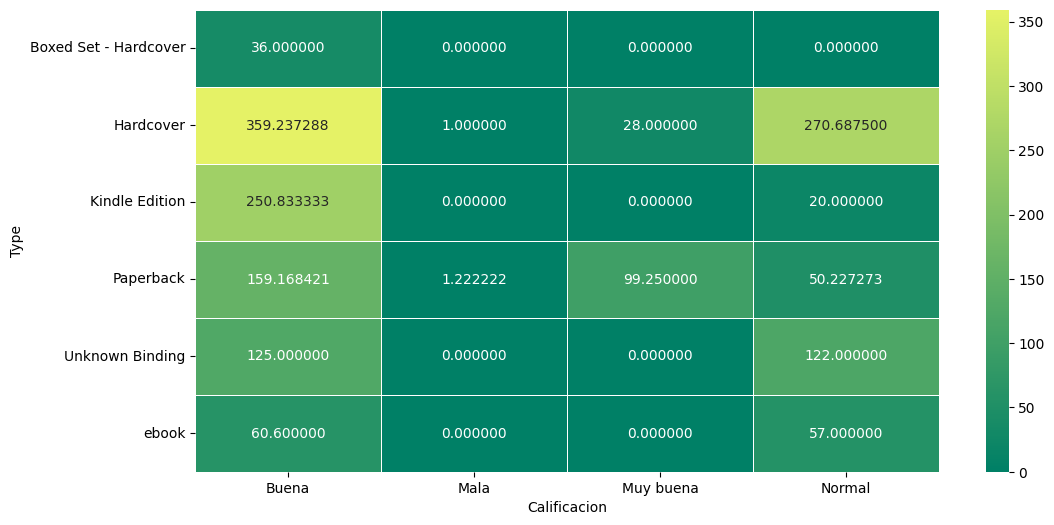

In [ ]:
sns.heatmap(
    df_pivoteado,
    annot=True,
    fmt="f",
    annot_kws={'size': 10},
    cmap='summer', # coolwarm
    linewidths=.5,
    center=200
    )

# Documentación
- Pandas: [pandas.pydata.org](https://pandas.pydata.org/docs/reference/index.html)
- Matplotlib.pyplot: [matplotlib.org](https://matplotlib.org/stable/api/pyplot_summary.html)
- Seaborn: [seaborn.pydata.org](https://seaborn.pydata.org/api.html)

# Referencias
* Base de datos. Konstantin, T. (2021, 11 de enero). _Top 270 Computer Science / Programing Books_, Versión 2. Kaggle. Obtenido el 11 de abril, 2021 de https://www.kaggle.com/thomaskonstantin/top-270-rated-computer-science-programing-books
* _Catálogo de Visualización de Datos_. (n.d.). Catálogo de Visualización de Datos. Obtenido el 12 de abril, 2021, de https://datavizcatalogue.com/ES/
